In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [4]:
df.shape

(10000, 3)

In [5]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


{'whiskers': [<matplotlib.lines.Line2D at 0x2408a22a150>,
 'caps': [<matplotlib.lines.Line2D at 0x2408a22a5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2408a0efc50>],
 'medians': [<matplotlib.lines.Line2D at 0x2408a22aba0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2408a22ae70>],
 'means': []}

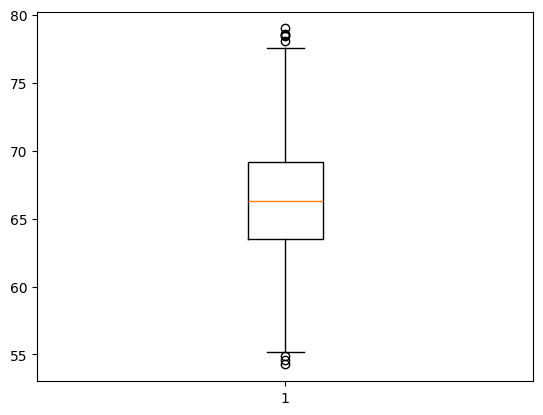

In [7]:
plt.boxplot(df['Height'])



{'whiskers': [<matplotlib.lines.Line2D at 0x2408a2d49b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2408a2d4ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2408a2d4710>],
 'medians': [<matplotlib.lines.Line2D at 0x2408a2d5400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2408a2d56d0>],
 'means': []}

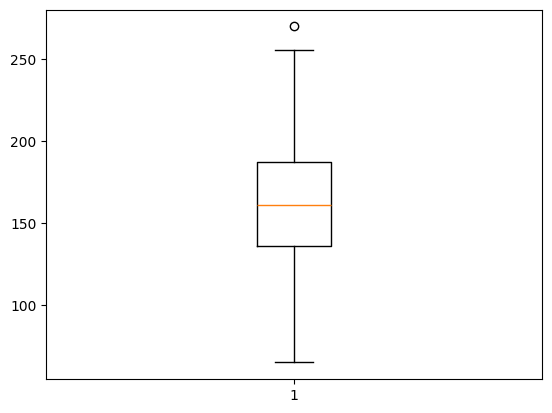

In [8]:
plt.boxplot(df['Weight'])


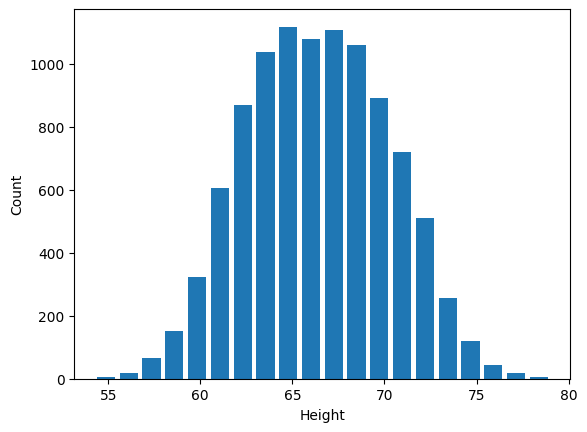

In [9]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

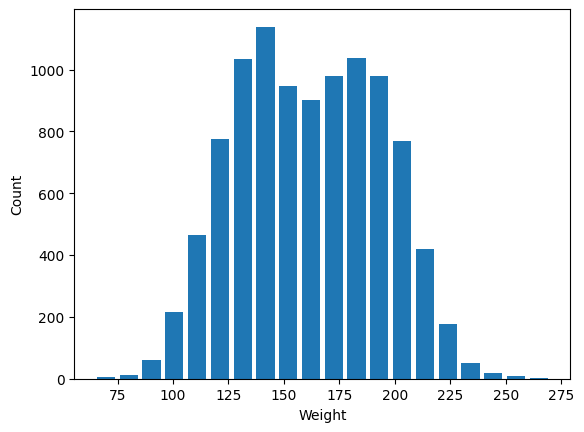

In [10]:
plt.hist(df.Weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [11]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Detect outliers based on height
--------------------------------

In [12]:
height_q1=df['Height'].quantile(0.25)
height_q3=df['Height'].quantile(0.75)

In [13]:
height_q1

63.505620481218955

In [14]:
height_q3

69.1742617268347

In [15]:
height_iqr=height_q3-height_q1

In [16]:
upper_limit_height=height_q3+(1.5*height_iqr)
lower_limit_height=height_q1-(1.5*height_iqr)


In [17]:
upper_limit_height

77.67722359525831

In [18]:
lower_limit_height

55.00265861279534

In [19]:
final_df_height=df.loc[(df['Height']>lower_limit_height)&(df['Height']<upper_limit_height)]
final_df_height

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [20]:
df.loc[df['Height']<lower_limit_height]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [21]:
df.loc[df['Height']>upper_limit_height]


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


In [22]:
df['Height'].shape[0]-final_df_height['Height'].shape[0]

8

There are total 8 outliers in height

Detect outliers based on weight
--------------------------------

In [23]:
weight_q1=df['Weight'].quantile(0.25)
weight_q3=df['Weight'].quantile(0.75)

In [24]:
weight_q1

135.8180513055015

In [25]:
weight_q3

187.16952486868348

In [26]:
weight_iqr=weight_q3-weight_q1

In [27]:
weight_iqr

51.35147356318197

In [28]:
upper_limit_weight=weight_q3+(1.5*weight_iqr)
lower_limit_weight=weight_q1-(1.5*weight_iqr)

In [29]:
upper_limit_weight

264.19673521345646

In [30]:
lower_limit_weight

58.79084096072856

In [31]:
final_df_weight=df.loc[(df['Weight']>lower_limit_weight)&(df['Weight']<upper_limit_weight)]
final_df_weight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [32]:
df.loc[df['Weight']<lower_limit_weight]


,Gender,Height,Weight


In [33]:
df.loc[df['Weight']>upper_limit_weight]


,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [34]:
df.Weight.shape[0]-final_df_weight.Weight.shape[0]

1

In [35]:
final_df_weight

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


There is only 1 outlier in the Weight column